In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#패키지를 임포트하고 데이터를 준비함
# 패션 MNIST 데이터를 학습용 데이터, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape) # train 이미지셋은 6만개에 28*28
print(train_labels) #라벨은 0~9로 10개
print(test_images.shape)# test 이미지셋은 6만개에 28*28

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [7]:
train_images = train_images[:,:,:,np.newaxis] #합성공 신경망은(데이터의 인스턴스의수, 데이터의 행수, 데이터의 열 수, 채널수) 형태로 제공해야됌, 그래서 newaxiss를 활용하여 채널수 채워줌
test_images = test_images[:,:,:,np.newaxis]

In [13]:
model = keras.models.Sequential([ #나만의 CNN 구현
                                keras.layers.Conv2D(input_shape = (28,28,1),  #input의 shape은 28*28사이즈, CONV계층 구현
                                                    kernel_size = (5,5), padding = 'same', #커널사이즈는 5*5로 하고 패딩을 same으로 해서 데이터손실없게함
                                                    filters =6), #특징은 6개를 추출함
                                keras.layers.MaxPooling2D((2,2),strides=2), #풀링계층 커널 사이즈는 2*2, 보폭은 2로 한다

                                keras.layers.Conv2D(kernel_size = (5,5), #커널사이즈는 5*5로하고 특징맵은 16개 추출
                                                    filters =16),
                                keras.layers.MaxPooling2D((2,2),strides=2), #풀링계층 커널 사이즈는 2*2, 보폭은 2로 한다

                                keras.layers.Conv2D(kernel_size = (5,5), #커널사이즈는 5*5로 하고 특징맵은 120개 추출
                                                    filters =120),
                                
                                keras.layers.Flatten(), #평탄화 과정 진행
                                keras.layers.Dense(128, activation = 'relu'), #dense는 128로 활성함수는 relu사용
                                keras.layers.Dense(32, activation = 'relu'), #dense는 32로 활성함수는 relu사용
                                keras.layers.Dense(10, activation = 'softmax'), #dense는 10으로 활성함수는softmax사용
                                                    
])

In [14]:
model.summary() #모델요약

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [15]:
model.compile(optimizer= "adam", #모델 컴파일 실행, 손실값과 정확도는 history에 기록됨
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, # 15에폭 사용, 75%는 데이터학습에 나머지는 검증에 사용하는 교차검증 사용
                    epochs=15, validation_split = 0.25)

Epoch 1/15
1407/1407 [==============================] - 40s 27ms/step - loss: 0.6492 - accuracy: 0.8039 - val_loss: 0.4422 - val_accuracy: 0.8487
Epoch 2/15
1407/1407 [==============================] - 39s 28ms/step - loss: 0.3897 - accuracy: 0.8636 - val_loss: 0.4135 - val_accuracy: 0.8539
Epoch 3/15
1407/1407 [==============================] - 41s 29ms/step - loss: 0.3595 - accuracy: 0.8725 - val_loss: 0.3603 - val_accuracy: 0.8729
Epoch 4/15
1407/1407 [==============================] - 38s 27ms/step - loss: 0.3348 - accuracy: 0.8800 - val_loss: 0.4015 - val_accuracy: 0.8627
Epoch 5/15
1407/1407 [==============================] - 38s 27ms/step - loss: 0.3213 - accuracy: 0.8848 - val_loss: 0.4074 - val_accuracy: 0.8601
Epoch 6/15
1407/1407 [==============================] - 38s 27ms/step - loss: 0.3092 - accuracy: 0.8896 - val_loss: 0.3538 - val_accuracy: 0.8808
Epoch 7/15
1407/1407 [==============================] - 38s 27ms/step - loss: 0.2936 - accuracy: 0.8947 - val_loss: 0.3639 -

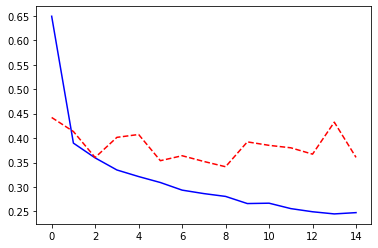

In [16]:
plt.plot(history.history['loss'],'b-') #손실 비교 파란색이 훈련용 데이터,빨간색이 교차검증용
plt.plot(history.history['val_loss'],'r--') 

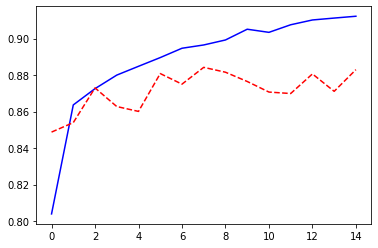

In [17]:
plt.plot(history.history['accuracy'],'b-')#정확도 비교 파란색이 훈련용 데이터,빨간색이 교차검증용
plt.plot(history.history['val_accuracy'],'r--')

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('테스트 정확도:',test_acc) #90%이상의 정확도 보임

313/313 - 3s - loss: 0.3787 - accuracy: 0.8749 - 3s/epoch - 10ms/step
테스트 정확도: 0.8748999834060669


In [19]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 
#클래스를 나타내는 정수를 문자열로 바꾸기 위한 문자열 리스트 생성

In [20]:
randIdx = np.random.randint(0,1000)
#난수발생시켜 인덱스로 사용하여 얻을수있는 테스트 이미지부터 시작하여 25개의 데이터를 얻은 뒤, 데이터 모델에 제공하여 예측하게 함
images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images),axis=1)
print(predictions)

[1 6 4 3 8 2 8 6 7 0 4 0 8 5 0 8 2 9 0 8 9 6 4 2 9]


In [21]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28,28)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, cmap='gray', interpolation='nearest')

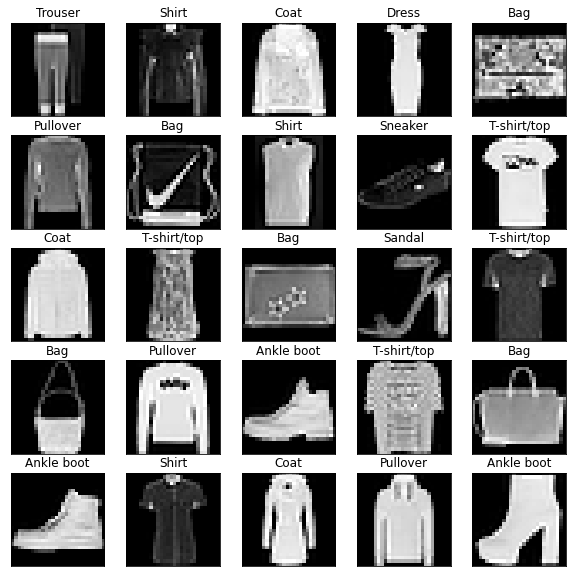

In [22]:
plot_images(images, predictions, images_per_row = 5) #이미지와 예측결과

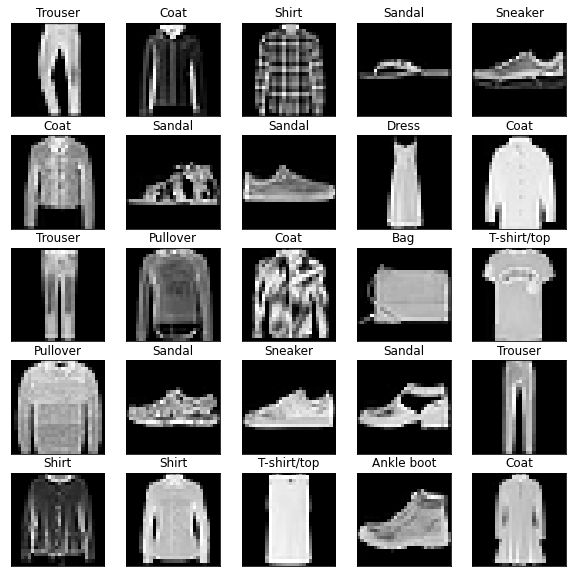

In [23]:
randIdx = np.random.randint(0, 1000)
#난수 발생과 예측하기를 반복하여 다양한 검증 데이터를 사용하여 예측 결과를 확인가능함
images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)